In [1]:
#show plot inline in notebook
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('2017.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(155, 12)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
f1 = data.iloc[:,2]
f2 = data['Generosity'].values

In [6]:
f2

array([0.36201224, 0.35528049, 0.47554022, 0.29054928, 0.24548277,
       0.47048983, 0.43553972, 0.50000513, 0.38539925, 0.47769925,
       0.33008265, 0.21461323, 0.31647232, 0.39257878, 0.42785832,
       0.33626917, 0.23150334, 0.28318098, 0.49277416, 0.32666242,
       0.36094195, 0.16234989, 0.08810676, 0.10945706, 0.12099043,
       0.34596598, 0.57473058, 0.17509693, 0.28348839, 0.21055694,
       0.12976231, 0.57212311, 0.25836048, 0.19013357, 0.33047387,
       0.14901447, 0.14761601, 0.32529646, 0.2282898 , 0.13654448,
       0.17266849, 0.41660893, 0.30167422, 0.15011247, 0.07825799,
       0.15846597, 0.41598365, 0.17278965, 0.05226382, 0.24001564,
       0.12057277, 0.01016466, 0.06943665, 0.15307479, 0.20667437,
       0.20877913, 0.13351992, 0.22556072, 0.24992499, 0.20196442,
       0.2668457 , 0.24264909, 0.12681971, 0.36093375, 0.2712543 ,
       0.09889081, 0.15513751, 0.15207367, 0.04669304, 0.22415066,
       0.37446579, 0.19351342, 0.22012588, 0.17217046, 0.07840

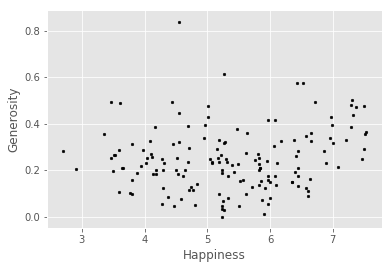

(155, 2)

In [3]:
# Getting the values and plotting it
f1 = data.iloc[:,2]
f2 = data['Generosity'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel("Happiness")
plt.ylabel("Generosity")
plt.show()
X.shape

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
# Number of clusters
k = 2
# Generate random centroids
C_x = np.random.rand(k)*np.max(X[:,0])
C_y = np.random.rand(k)*np.max(X[:,1])
# zip up C_x, C_y to be numpy arrary
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[5.470743   0.5288578 ]
 [6.4881787  0.64371884]]


Text(0,0.5,'Generosity')

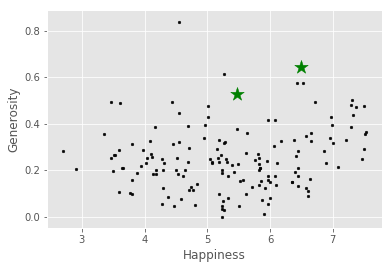

In [6]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C[:,0],C[:,1], marker='*', s=200, c='g')
plt.xlabel("Happiness")
plt.ylabel("Generosity")

In [7]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

In [8]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        #assign each point index to its closest centroid
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        #go through all points and find points associated with each centroid
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

Text(0,0.5,'Generosity')

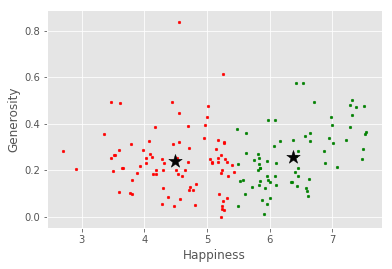

In [9]:
#plot data by closest k-mean association
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.xlabel("Happiness")
plt.ylabel("Generosity")

In [10]:
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

Text(0,0.5,'Generosity')

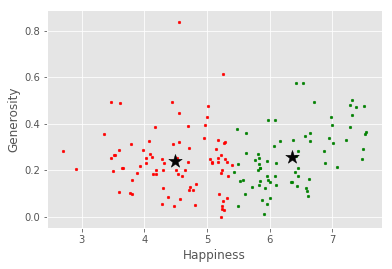

In [12]:
#plot data by closest k-mean association
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel("Happiness")
plt.ylabel("Generosity")

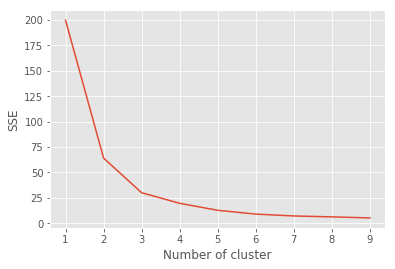

In [13]:
sse = {}
for z in range(1, 10):
    kmeans = KMeans(n_clusters=z).fit(X)
    #print(data["clusters"])
    sse[z] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [14]:
k = 3
kmeans = KMeans(n_clusters=k).fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

Text(0,0.5,'Generosity')

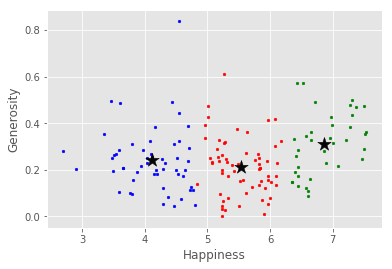

In [15]:
#plot data by closest k-mean association
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel("Happiness")
plt.ylabel("Generosity")

From the figure above, it shows that as people become happier, they tend to be slightly more generous. However, due to lack of data, the trend is not obvious. 
On the other hand, the group of people that are least generous are the ones feeling moderate happy. This finding might have some psycological indications, such as that this group of people might be more cautious to spending.